In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [263]:
df=pd.read_csv('Training_Data_Set.csv')
df

,Id,Maker,model,Location,Distance,Owner Type,manufacture_year,Age of car,engine_displacement,engine_power,body_type,Vroom Audit Rating,transmission,door_count,seat_count,fuel_type,Price
0,25001,skoda,octavia,Ahmedabad,NaN,Second,1964,55,1964,147.0,compact,8,man,NaN,NaN,petrol,543764.25
1,25002,fiat,panda,Ahmedabad,27750.0,Third,2012,7,1242,51.0,NaN,6,man,4.0,4.0,petrol,401819.25
2,25003,bmw,x1,Hyderabad,46000.0,Third,2014,5,1995,105.0,NaN,7,auto,4.0,5.0,diesel,2392855.50
3,25004,nissan,juke,Mumbai,43949.0,Third,2011,8,1618,140.0,NaN,7,man,4.0,5.0,petrol,958606.50
4,25005,bmw,x5,Jaipur,59524.0,Fourth & Above,2012,7,2993,180.0,NaN,7,auto,4.0,5.0,diesel,3085561.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53510,78511,skoda,octavia,Delhi,29334.0,Fourth & Above,2014,5,1598,77.0,NaN,4,man,4.0,5.0,diesel,1342996.50
53511,78512,skoda,octavia,Bangalore,223631.0,Fourth & Above,2009,10,1900,77.0,NaN,8,man,5.0,5.0,diesel,510732.75
53512,78513,bmw,x1,Pune,25500.0,Third,2015,4,1995,105.0,NaN,4,auto,4.0,5.0,diesel,2008123.50
53513,78514,toyota,avensis,Jaipur,1195500.0,Third,2011,8,11950,93.0,compact,5,man,NaN,NaN,diesel,874352.25


In [265]:
df.drop(columns=['body_type'],inplace=True)

In [267]:
df['Distance '].fillna(df['Distance '].median(),inplace=True)

In [269]:
df['engine_power'].fillna(df['engine_power'].median(),inplace=True)

In [271]:
df['seat_count'].fillna(df['seat_count'].mean(),inplace=True)

In [273]:
df['door_count'].fillna(df['door_count'].mode()[0],inplace=True)

In [275]:
df.columns

Index(['Id', 'Maker', 'model', 'Location', 'Distance ', 'Owner Type',
       'manufacture_year', 'Age of car', 'engine_displacement', 'engine_power',
       'Vroom Audit Rating', 'transmission', 'door_count', 'seat_count',
       'fuel_type', 'Price'],
      dtype='object')

In [277]:
df.dtypes

Id                       int64
Maker                   object
model                   object
Location                object
Distance               float64
Owner Type              object
manufacture_year         int64
Age of car               int64
engine_displacement      int64
engine_power           float64
Vroom Audit Rating       int64
transmission            object
door_count             float64
seat_count             float64
fuel_type               object
Price                  float64
dtype: object

In [279]:

df.isnull().sum()

Id                     0
Maker                  0
model                  0
Location               0
Distance               0
Owner Type             0
manufacture_year       0
Age of car             0
engine_displacement    0
engine_power           0
Vroom Audit Rating     0
transmission           0
door_count             0
seat_count             0
fuel_type              0
Price                  0
dtype: int64

In [281]:
df_cat=df.select_dtypes(include=object)
df_cat.dtypes

Maker           object
model           object
Location        object
Owner Type      object
transmission    object
fuel_type       object
dtype: object

In [283]:
df_num=df.select_dtypes(exclude=object)
df_num.dtypes

Id                       int64
Distance               float64
manufacture_year         int64
Age of car               int64
engine_displacement      int64
engine_power           float64
Vroom Audit Rating       int64
door_count             float64
seat_count             float64
Price                  float64
dtype: object

In [285]:
df_num=df_num.astype(int)

In [287]:
df_num.dtypes

Id                     int32
Distance               int32
manufacture_year       int32
Age of car             int32
engine_displacement    int32
engine_power           int32
Vroom Audit Rating     int32
door_count             int32
seat_count             int32
Price                  int32
dtype: object

In [289]:
df_cat.dtypes

Maker           object
model           object
Location        object
Owner Type      object
transmission    object
fuel_type       object
dtype: object

In [291]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [293]:
df_cat['Maker']=le.fit_transform(df_cat['Maker'])
df_cat['model']=le.fit_transform(df_cat['model'])
df_cat['Location']=le.fit_transform(df_cat['Location'])
df_cat['Owner Type']=le.fit_transform(df_cat['Owner Type'])
df_cat['transmission']=le.fit_transform(df_cat['transmission'])
df_cat['fuel_type']=le.fit_transform(df_cat['fuel_type'])

In [295]:
df=pd.concat([df_cat,df_num],axis=1)

In [297]:
df

,Maker,model,Location,Owner Type,transmission,fuel_type,Id,Distance,manufacture_year,Age of car,engine_displacement,engine_power,Vroom Audit Rating,door_count,seat_count,Price
0,6,8,0,2,1,1,25001,65520,1964,55,1964,147,8,4,4,543764
1,2,9,0,3,1,1,25002,27750,2012,7,1242,51,6,4,4,401819
2,1,18,5,3,0,0,25003,46000,2014,5,1995,105,7,4,5,2392855
3,5,6,9,3,1,1,25004,43949,2011,8,1618,140,7,4,5,958606
4,1,20,6,1,0,0,25005,59524,2012,7,2993,180,7,4,5,3085561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53510,6,8,4,1,1,0,78511,29334,2014,5,1598,77,4,4,5,1342996
53511,6,8,1,1,1,0,78512,223631,2009,10,1900,77,8,5,5,510732
53512,1,18,10,3,0,0,78513,25500,2015,4,1995,105,4,4,5,2008123
53513,7,1,6,3,1,0,78514,1195500,2011,8,11950,93,5,4,4,874352


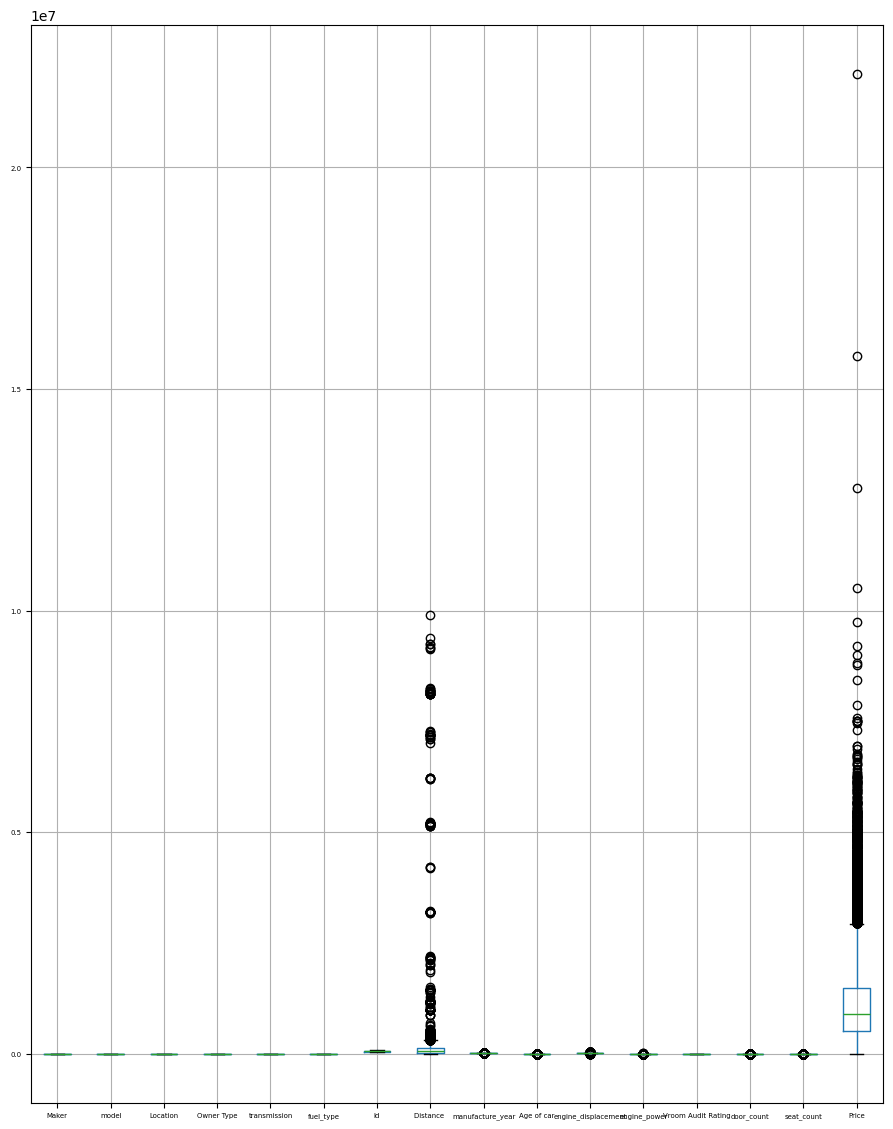

In [299]:
df.boxplot(fontsize=5,figsize=(11,14))
plt.show()

In [300]:
q1=df['Distance '].quantile(0.25)
q3=df['Distance '].quantile(0.75)
iqr=q3-q1
ll=q1-1.5*iqr
ul=q3+1.5*iqr
df_distance=df[['Distance ']][(df['Distance ']>ll)&(df['Distance ']<ul)]

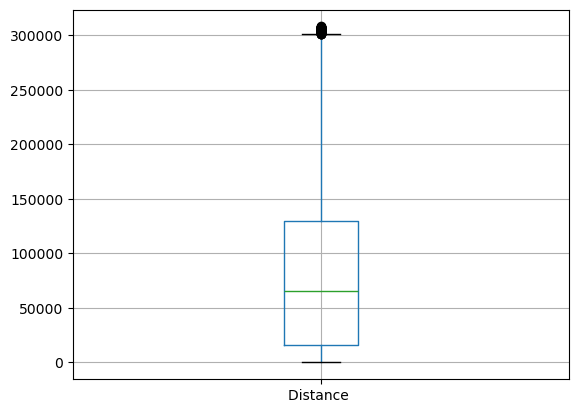

In [301]:
df_distance.boxplot()
plt.show()

In [302]:
q1=df_outlier.quantile(0.25)
q3=df_outlier.quantile(0.75)
iqr=q3-q1
ll=q1-1.5*iqr
ul=q3+1.5*iqr
df_outlier1=df[['Distance ']][(df_distance>ll)&(df_distance<ul)]

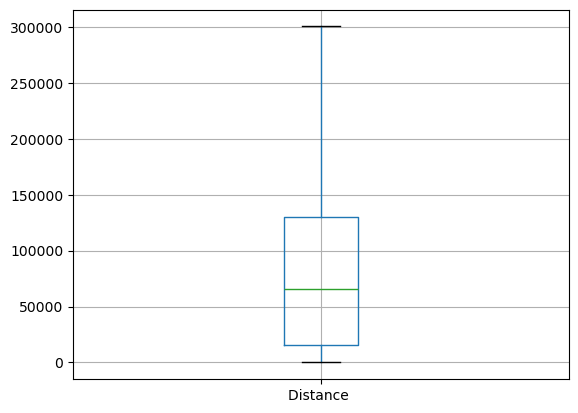

In [305]:
df_outlier1.boxplot()
plt.show()

In [308]:

q1=df['manufacture_year'].quantile(0.25)
q3=df['manufacture_year'].quantile(0.75)
iqr=q3-q1
ll=q1-1.5*iqr
ul=q3+1.5*iqr
df_manufacture=df[['manufacture_year']][(df['manufacture_year']>ll)&(df['manufacture_year']<ul)]


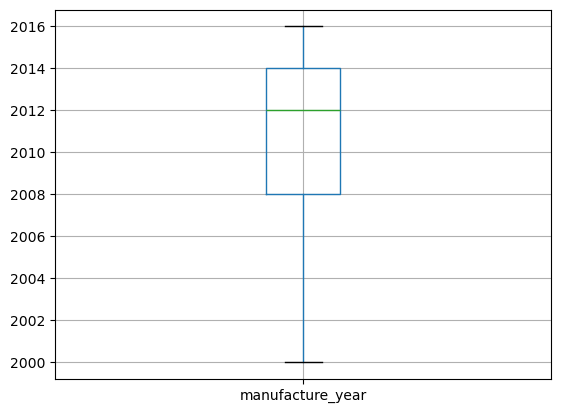

In [309]:
df_manufacture.boxplot()
plt.show()

In [311]:

q1=df['Age of car'].quantile(0.25)
q3=df['Age of car'].quantile(0.75)
iqr=q3-q1
ll=q1-1.5*iqr
ul=q3+1.5*iqr
df_Age=df[['Age of car']][(df['Age of car']>ll)&(df['Age of car']<ul)]


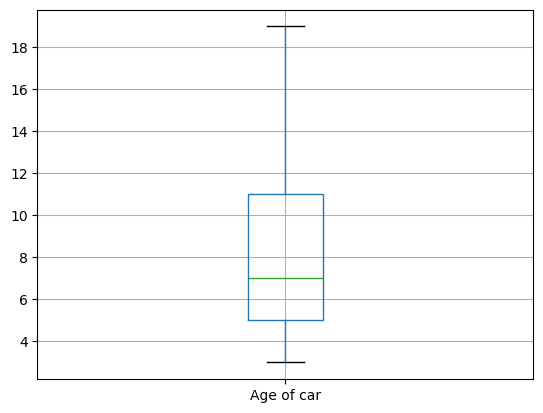

In [313]:
df_Age.boxplot()
plt.show()

In [314]:
q1=df['engine_displacement'].quantile(0.25)
q3=df['engine_displacement'].quantile(0.75)
iqr=q3-q1
ll=q1-1.5*iqr
ul=q3+1.5*iqr
df_engine_dis=df[['engine_displacement']][(df['engine_displacement']>ll)&(df['engine_displacement']<ul)]


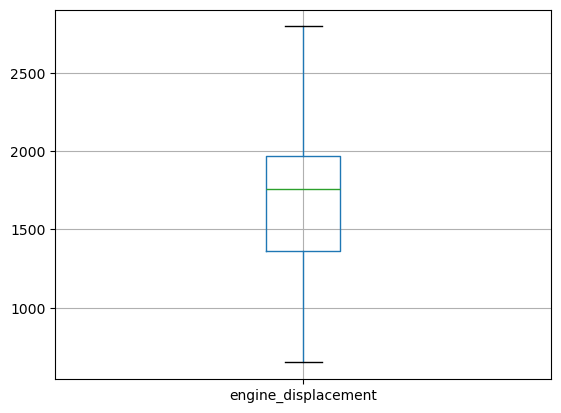

In [316]:
df_engine_dis.boxplot()
plt.show()

In [318]:
q1=df['engine_power'].quantile(0.25)
q3=df['engine_power'].quantile(0.75)
iqr=q3-q1
ll=q1-1.5*iqr
ul=q3+1.5*iqr
df_power=df[['engine_power']][(df['engine_power']>ll)&(df['engine_power']<ul)]


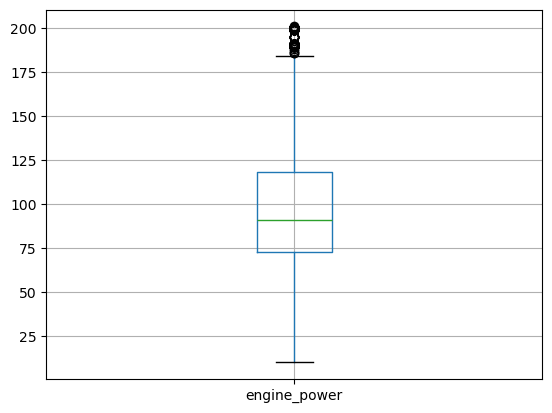

In [319]:
df_power.boxplot()
plt.show()

In [320]:
q1=df_power.quantile(0.25)
q3=df_power.quantile(0.75)
iqr=q3-q1
ll=q1-1.5*iqr
ul=q3+1.5*iqr
df_power_1=df[['engine_power']][(df_power>ll)&(df_power<ul)]

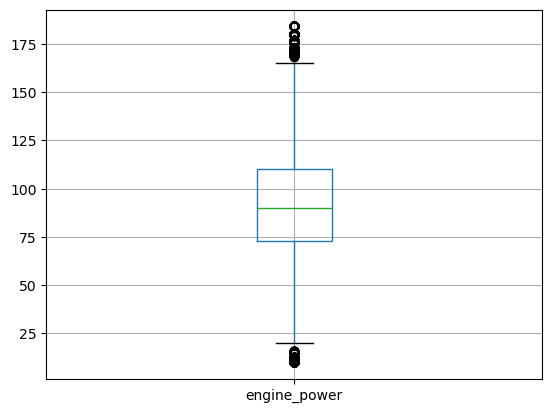

In [323]:
df_power_1.boxplot()
plt.show()

In [324]:
q1=df_power_1.quantile(0.25)
q3=df_power_1.quantile(0.75)
iqr=q3-q1
LL=q1-1.5*iqr
Ul=q3+1.5*iqr
df_power_2=df[['engine_power']][(df_power_1>LL)&(df_power_1<Ul)]

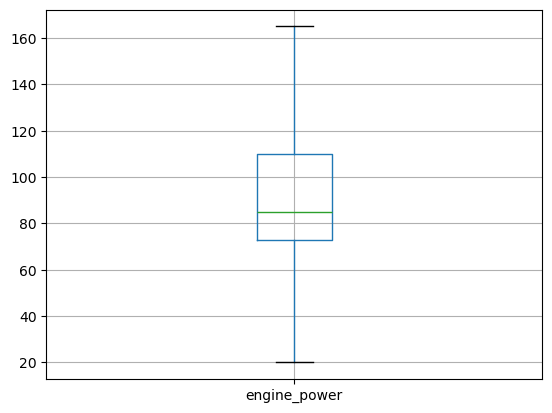

In [325]:
df_power_2.boxplot()
plt.show()

In [328]:
#'door_count'
q1=df['seat_count'].quantile(0.25)
q3=df['seat_count'].quantile(0.75)
iqr=q3-q1
ll=q1-1.5*iqr
ul=q3+1.5*iqr
df_seat=df[['seat_count']][(df['seat_count']>ll)&(df['seat_count']<ul)]


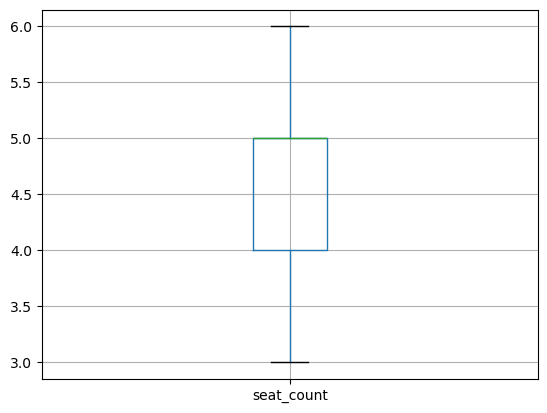

In [331]:
df_seat.boxplot()
plt.show()

In [332]:
q1=df['door_count'].quantile(0.25)
q3=df['door_count'].quantile(0.75)
iqr=q3-q1
LL=q1-1.5*iqr
Ul=q3+1.5*iqr

In [335]:
df_door=df[['door_count']][(df['door_count']>LL)&(df['door_count']<Ul)]

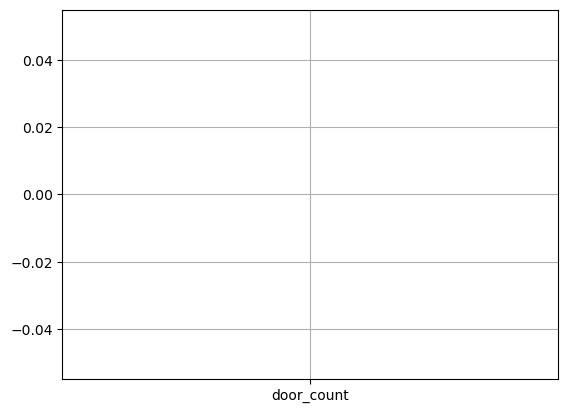

In [338]:
df_door.boxplot()
plt.show()

In [342]:
Q1=df[['Price']].quantile(0.25)
Q1
Q3=df[['Price']].quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_Price=(df[['Price']][(df[['Price']]>LL)&(df[['Price']]<UL)])

In [343]:
Q1=df2_Price.quantile(0.25)
Q1
Q3=df2_Price.quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_Price1=(df[['Price']][(df2_Price>LL)&(df2_Price<UL)])

In [345]:
Q1=df2_Price1.quantile(0.25)
Q1
Q3=df2_Price1.quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_Price2=(df[['Price']][(df2_Price1>LL)&(df2_Price1<UL)])

In [348]:
Q1=df2_Price2.quantile(0.25)
Q1
Q3=df2_Price2.quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_Price3=(df[['Price']][(df2_Price2>LL)&(df2_Price2<UL)])

In [349]:
Q1=df2_Price3.quantile(0.25)
Q1
Q3=df2_Price3.quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_Price4=(df[['Price']][(df2_Price3>LL)&(df2_Price3<UL)])

In [351]:
Q1=df2_Price4.quantile(0.25)
Q1
Q3=df2_Price4.quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_Price5=(df[['Price']][(df2_Price4>LL)&(df2_Price4<UL)])

In [352]:
Q1=df2_Price5.quantile(0.25)
Q1
Q3=df2_Price5.quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_Price6=(df[['Price']][(df2_Price5>LL)&(df2_Price5<UL)])

In [355]:
Q1=df2_Price6.quantile(0.25)
Q1
Q3=df2_Price6.quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_Price7=(df[['Price']][(df2_Price6>LL)&(df2_Price6<UL)])

In [357]:
Q1=df2_Price7.quantile(0.25)
Q1
Q3=df2_Price7.quantile(0.75)
Q3
IQR=Q3-Q1
IQR
LL=Q1-1.5*IQR
UL=Q3+1.5*IQR
df2_Price8=(df[['Price']][(df2_Price7>LL)&(df2_Price7<UL)])

In [359]:
df_price=df[['Price']]

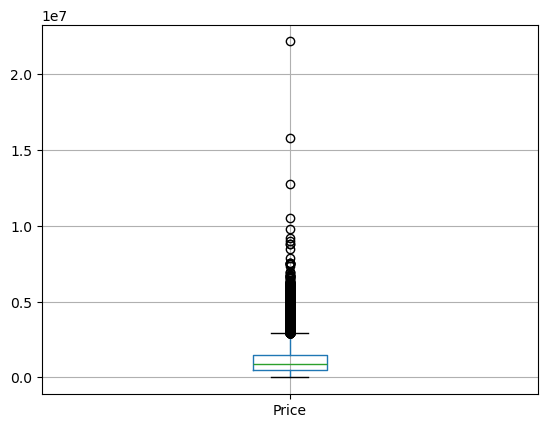

In [363]:
df_price.boxplot()
plt.show()

In [393]:
df1=pd.concat([df_cat,df_outlier1,df_manufacture, df_Age, df_engine_dis, df_power_2, df_seat, df[['door_count']],df[['Id']],
               df[['Vroom Audit Rating']],df_price,df2_Price8],axis=1)

In [395]:
df1

,Maker,model,Location,Owner Type,transmission,fuel_type,Distance,manufacture_year,Age of car,engine_displacement,engine_power,seat_count,door_count,Id,Vroom Audit Rating,Price,Price
0,6,8,0,2,1,1,65520.0,NaN,NaN,1964.0,147.0,4.0,4,25001,8,543764,543764.0
1,2,9,0,3,1,1,27750.0,2012.0,7.0,1242.0,51.0,4.0,4,25002,6,401819,401819.0
2,1,18,5,3,0,0,46000.0,2014.0,5.0,1995.0,105.0,5.0,4,25003,7,2392855,2392855.0
3,5,6,9,3,1,1,43949.0,2011.0,8.0,1618.0,140.0,5.0,4,25004,7,958606,958606.0
4,1,20,6,1,0,0,59524.0,2012.0,7.0,NaN,NaN,5.0,4,25005,7,3085561,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53510,6,8,4,1,1,0,29334.0,2014.0,5.0,1598.0,77.0,5.0,4,78511,4,1342996,1342996.0
53511,6,8,1,1,1,0,223631.0,2009.0,10.0,1900.0,77.0,5.0,5,78512,8,510732,510732.0
53512,1,18,10,3,0,0,25500.0,2015.0,4.0,1995.0,105.0,5.0,4,78513,4,2008123,2008123.0
53513,7,1,6,3,1,0,NaN,2011.0,8.0,NaN,93.0,4.0,4,78514,5,874352,874352.0


In [397]:
df1.isnull().sum()

Maker                     0
model                     0
Location                  0
Owner Type                0
transmission              0
fuel_type                 0
Distance                660
manufacture_year       1325
Age of car             1325
engine_displacement    5651
engine_power           5223
seat_count             1581
door_count                0
Id                        0
Vroom Audit Rating        0
Price                     0
Price                  2961
dtype: int64

In [399]:
df1.dtypes

Maker                    int32
model                    int32
Location                 int32
Owner Type               int32
transmission             int32
fuel_type                int32
Distance               float64
manufacture_year       float64
Age of car             float64
engine_displacement    float64
engine_power           float64
seat_count             float64
door_count               int32
Id                       int32
Vroom Audit Rating       int32
Price                    int32
Price                  float64
dtype: object

In [405]:
df1.dropna(subset=['Distance ','manufacture_year', 'Age of car',
       'engine_displacement', 'engine_power','Price','seat_count'],inplace=True)

In [407]:
df1.isnull().sum()

Maker                  0
model                  0
Location               0
Owner Type             0
transmission           0
fuel_type              0
Distance               0
manufacture_year       0
Age of car             0
engine_displacement    0
engine_power           0
seat_count             0
door_count             0
Id                     0
Vroom Audit Rating     0
Price                  0
Price                  0
dtype: int64

In [377]:
df1=df1.astype(int)

In [409]:
df3_price=df1[['Price']]

In [411]:
df1.drop(columns='Price',inplace=True)

In [413]:
df.columns

Index(['Maker', 'model', 'Location', 'Owner Type', 'transmission', 'fuel_type',
       'Id', 'Distance ', 'manufacture_year', 'Age of car',
       'engine_displacement', 'engine_power', 'Vroom Audit Rating',
       'door_count', 'seat_count', 'Price'],
      dtype='object')

In [415]:
df2=pd.concat([df1,df3_price],axis=1)

In [417]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df_stand=pd.DataFrame(ss.fit_transform(df2),columns=df2.columns)

In [419]:
df_stand.isnull().sum()

Maker                  0
model                  0
Location               0
Owner Type             0
transmission           0
fuel_type              0
Distance               0
manufacture_year       0
Age of car             0
engine_displacement    0
engine_power           0
seat_count             0
door_count             0
Id                     0
Vroom Audit Rating     0
Price                  0
Price                  0
dtype: int64

In [421]:
df.isnull().sum()

Maker                  0
model                  0
Location               0
Owner Type             0
transmission           0
fuel_type              0
Id                     0
Distance               0
manufacture_year       0
Age of car             0
engine_displacement    0
engine_power           0
Vroom Audit Rating     0
door_count             0
seat_count             0
Price                  0
dtype: int64

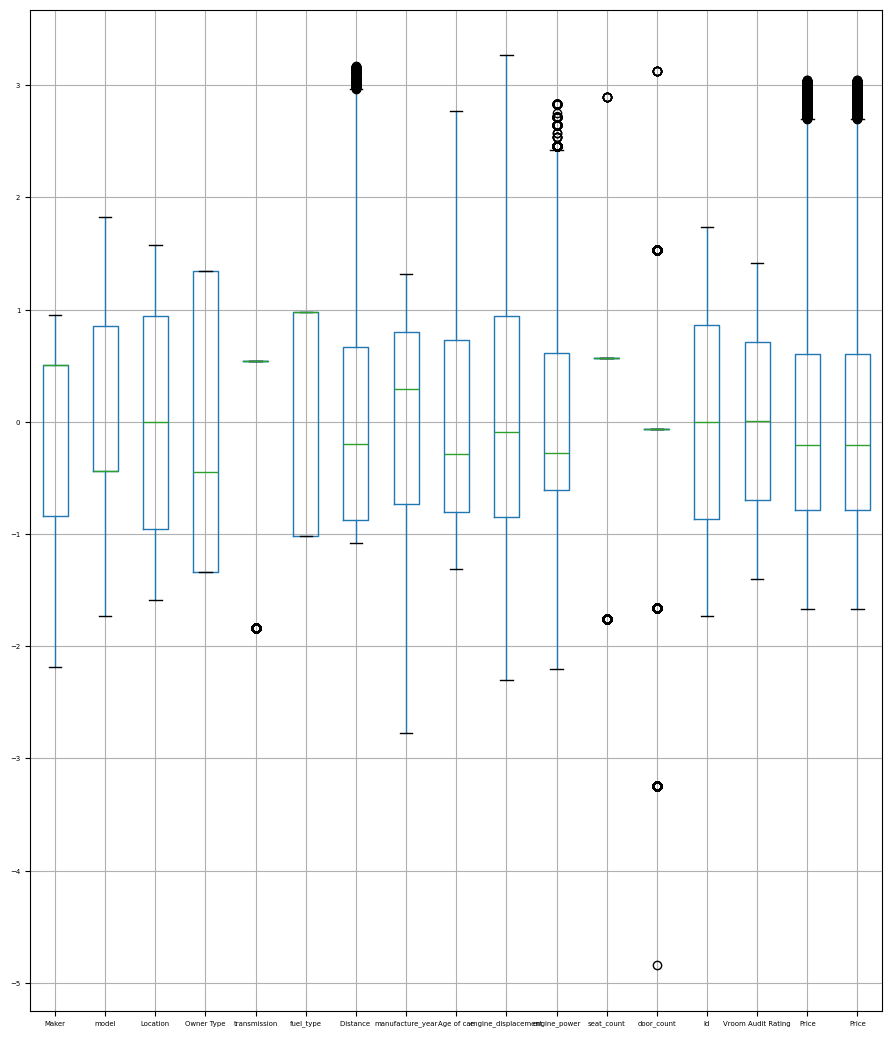

In [423]:
df_stand.boxplot(fontsize=5,figsize=(11,13))
plt.show()

In [425]:
X=df_stand[['Maker', 'model', 'Location', 'Owner Type', 'transmission', 'fuel_type','Id', 'Distance ', 'manufacture_year', 'Age of car','engine_displacement', 'engine_power', 'Vroom Audit Rating','door_count', 'seat_count']]
y=df_stand['Price']

In [427]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [429]:
model.fit(X,y)

LinearRegression()

In [431]:
y_predicted=pd.DataFrame(model.predict(X))

In [433]:
model.score(X,y)

0.8280576611159285

In [435]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y,y_predicted)

0.1719423388840715

In [437]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y,y_predicted)

0.31889622183915356